In [2]:
import pandas as pd
import os 
import spacy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ftfy
import re

# USA

In [3]:
us = pd.read_csv('Dataset_US.csv')

In [4]:
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].replace({"'": ""}, regex=True)
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].apply(pd.to_numeric, errors='coerce')
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].round(2)



In [5]:
us['company_score'] = us['company_score'].round(1)

In [6]:
state_abbreviations = {
    "Minnesota": "MN",
    "Utah": "UT",
    "Georgia": "GA",
    "Tennessee": "TN",
    "Indiana": "IN",
    "Arizona": "AZ",
    "Alabama": "AL",
    "New York State": "NY",
    "Massachusetts": "MA",
    "Colorado": "CO",
    "Florida": "FL",
    "California": "CA",
    "Oregon": "OR",
    "Maryland": "MD",
    "Texas": "TX",
    "Virginia": "VA",
    "Pennsylvania": "PA",
    "New Jersey": "NJ",
    "North Carolina": "NC",
    "Washington State": "WA",
    "United States" : "Remote", 
    "Minneapolis-Saint Paul" : "MN", 
    "Los Angeles, CA" : "CA", 
    "Nassau, NY" : "NY",
    "Township of Hamilton" : "NJ",
    "Whitehall Township" : "PA", 
    "Redstone Arsenal" : "AL"
}


In [7]:
# Reemplazar los nombres de los estados por sus abreviaturas
us['state'] = us['state'].replace(state_abbreviations)


In [8]:
us['company'] = us['company'].replace('<Intent>', 'Intent')

In [9]:
us['company_score'] = us['company_score'].replace(-1, 1)



In [10]:

city_replacements = {
    "United States": "Unspecified",
    "Unspecified": "Unspecified",
    "Kennedy Sp Ct": "Kennedy Space Center",
    "Patrick AFB": "Patrick Air Force Base",
    "Stennis Space Center": "Stennis Space Center",
    "Point Mugu NAWC": "Point Mugu",
    "Redstone Arsenal": "Huntsville",
    "Offutt AFB": "Offutt Air Force Base",
    "Eglin AFB": "Eglin Air Force Base",
    "Hill AFB" : "Hill Air Force Base",
    "Edwards AFB" : "Edwards Air Force Base",
    "Offutt A F B" : "Offutt Air Force Base",
    "Aberdeen Proving Ground": "Aberdeen",
    "Kennedy Space Center": "Kennedy Space Center",
    "Phila": "Philadelphia",
}


In [11]:
us['city'] = us['city'].replace(city_replacements)

In [12]:

us['position'] = us['position'].str.replace(r'\(.*?\)', '', regex=True)


us['position'] = us['position'].str.strip()


In [13]:

us['position'] = us['position'].str.replace('â€“', '', regex=False)


us['position'] = us['position'].str.strip()


In [14]:
# Eliminar números, símbolos de moneda y guiones de la columna 'position'
us['position'] = us['position'].str.replace(r'\$\d+/?\d*|\d+/?\d*|–|-', '', regex=True)

# Eliminar espacios en blanco sobrantes después de eliminar los números
us['position'] = us['position'].str.strip()


In [15]:
us['position'] = us['position'].str.replace('+ years of experience', '', regex=False)

us['position'] = us['position'].str.replace('hr  hr  ', '', regex=False)

us['position'] = us['position'].str.strip()

In [16]:
us.sample(20)


,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
613,Intrafi Network,3.3,Software Engineer,"Elkridge, MD",Elkridge,MD,software engineer,junior,121000.00,181000.00,151000.00,NaN,NaN,NaN,NaN,NaN,NaN
210,Persistent Systems,4.6,Workday Software Engineer,United States,Unspecified,Remote,software engineer,junior,141000.00,239000.00,190000.00,NaN,NaN,NaN,NaN,NaN,NaN
779,Ava Counsulting,4.2,"Software Engineer, Tools Gpu (Core)","Emeryville, CA",Emeryville,CA,software engineer,junior,104106.76,153335.87,128717.26,NaN,NaN,NaN,NaN,NaN,NaN
1610,Equian Llc,3.2,Senior Data Engineer,"Franklin, TN",Franklin,TN,data engineer,senior,76000.00,142000.00,109000.00,Sr. Data Engineer FTE for Franklin There ar...,Health Care Services & Hospitals,Health Care,"[""Deliver solutions that are devoid of signifi...",[],['We are looking for a Senior Data Management ...
995,Cintra Us Services Llc,3.7,Data Science Trainee,"Austin, TX",Austin,TX,data scientist,junior,63000.00,97000.00,80000.00,About us: Who is Cintra? Cintra is the l...,Construcción,"Servicios de construcción, reparación y manten...",['Job Description: Develop your data driven...,[],['Cintra is the leading private-sector transpo...
348,Innovative Defense Technologies (Idt),3.9,Software Engineer 3,"Annapolis Junction, MD",Annapolis Junction,MD,software engineer,junior,65000.00,112000.00,88500.00,NaN,NaN,NaN,NaN,NaN,NaN
1255,Equity Residential,4.3,Senior Data Scientist,"Chicago, IL",Chicago,IL,data scientist,senior,110000.00,150000.00,130000.00,"Working for Equity Residential (EQR), a leadin...",Real Estate,Real Estate,"['Each day will be unique, requiring an abilit...","['You are flexible, composed, and able to prio...","[""We've got the best people in the business, a..."
798,"Red Hat, Inc.",2.7,Sr. Software Engineer – Full Stack,"Alameda, CA",Alameda,CA,software engineer,senior,104106.76,153335.87,128717.26,NaN,NaN,NaN,NaN,NaN,NaN
1475,Calibre Systems,3.7,Data Analyst,"Alexandria, VA",Alexandria,VA,data analyst,unspecified,50000.00,92000.00,71000.00,Data Analyst Category Finance and Accoun...,It Services,Information Technology,['Required Skills Possess an active SECRET ...,[],['Responsibilities: Support all analytical an...
444,Promega,4.8,Python Developer,"Morris Plains, NJ",Morris Plains,NJ,python developer,unspecified,67000.00,128000.00,97500.00,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1680 non-null   object 
 1   company_score     1680 non-null   float64
 2   job_title         1680 non-null   object 
 3   location          1680 non-null   object 
 4   city              1680 non-null   object 
 5   state             1680 non-null   object 
 6   position          1680 non-null   object 
 7   seniority         1680 non-null   object 
 8   min_salary        1680 non-null   float64
 9   max_salary        1680 non-null   float64
 10  avg_salary        1680 non-null   float64
 11  job_info          810 non-null    object 
 12  industry          810 non-null    object 
 13  sector            810 non-null    object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [18]:

def plot_liers(df, column, title='Without Outliers Visualization'):
    """
    Visualiza valores atípicos para una columna numérica utilizando un scatterplot.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para analizar.
    title (str): El título del gráfico.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Data')
    # Scatterplot para valores atípicos
    sns.scatterplot(x=df.index, y=df[column], color='blue', alpha=0.6, label='Data Points')
    
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.legend()
    plt.show()

def detect_and_plot_outliers(df, column, threshold=4):
    """
    Detecta y visualiza valores atípicos en una columna numérica.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para analizar.
    threshold (float): El umbral para la detección de valores atípicos.
    """
    # Calcular z-scores
    zscores = zscore(df[column].dropna())
    
    # Detectar outliers
    outliers = df[np.abs(zscores) > threshold]
    non_outliers = df[np.abs(zscores) <= threshold]
    
    # Imprimir información sobre los outliers
    print(f"Detected outliers in '{column}':")
    print(outliers[column])
    
    print(f'Data before removing outliers: {len(df[column])}')
    print(f'Data after removing outliers: {len(non_outliers[column])}')
    
    # Visualizar datos sin outliers
    plot_liers(non_outliers, column, title=f'Values without Outliers in {column}')

# Aplicar la función a la columna 'min_salary' en df5


Detected outliers in 'min_salary':
157     295000.0
526     343000.0
578     310000.0
668     300000.0
743     248000.0
933     250000.0
1205    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1673


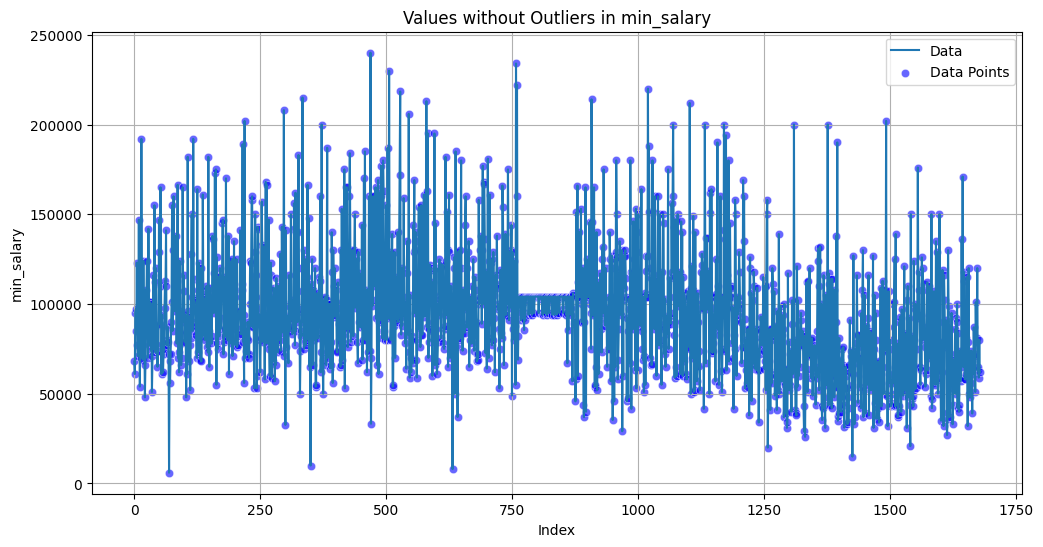

In [19]:
detect_and_plot_outliers(us, 'min_salary')


In [20]:

indices = [157, 526, 578, 668, 743, 933, 1205]

us_min_outliers = us.loc[indices]

display(us_min_outliers)


,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN
933,Bridgeline Solutions,3.6,Patent Agent (Machine Learning Ai/Computer Sci...,"Washington, DC",Washington,DC,machine learning engineer,junior,250000.0,250000.0,250000.0,Elite Amlaw firm is looking for a Patent Agent...,No Especifica,No Especifica,[],[],"['Industry experience in Software Development,..."
1205,Selby Jennings,3.1,Nlp Researcher,"New York, NY",New York,NY,nlp researcher,unspecified,250000.0,250000.0,250000.0,We have a current opportunity for an NLP Resea...,Selección de personal y Subcontratación,Recursos humanos,['An ideal candidate will possess the followin...,[],[]


Detected outliers in 'max_salary':
157    440000.0
369    385000.0
372    370000.0
427    385000.0
526    637000.0
578    465000.0
668    450000.0
743    385000.0
759    385000.0
Name: max_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1671


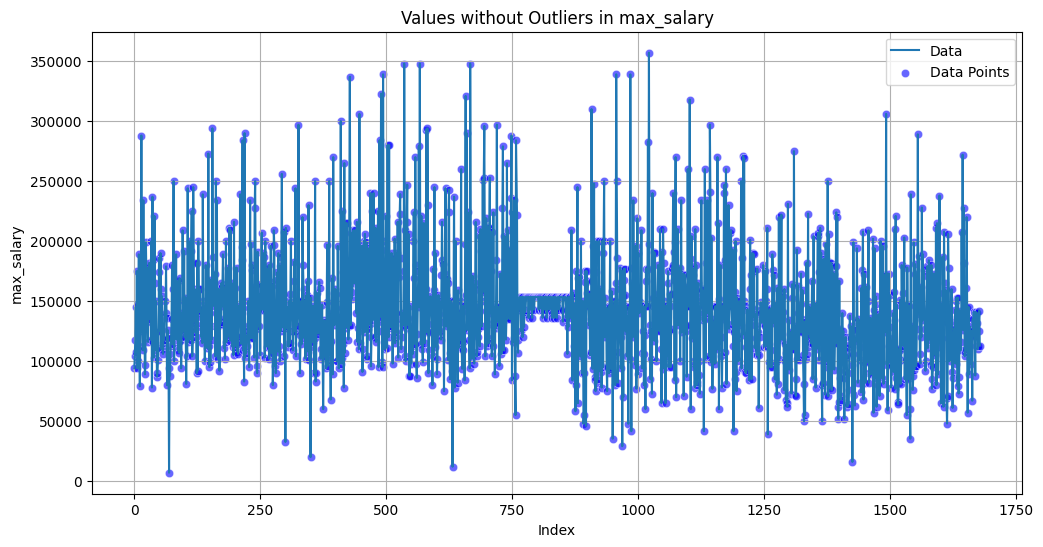

In [21]:
detect_and_plot_outliers(us, 'max_salary')

In [22]:
indices = [157, 369, 372, 427, 526, 578, 668, 743, 759]

us_mx_outliers = us.loc[indices]

display(us_mx_outliers)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
369,Snc,2.8,Video Software Engineer,"Lexington, MA",Lexington,MA,software engineer,junior,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN
372,Teamups,4.4,Devops Engineer,"Newtown Square, PA",Newtown Square,PA,devops engineer,junior,200000.0,370000.0,285000.0,NaN,NaN,NaN,NaN,NaN,NaN
427,Qinetiq Us,3.9,Front-End Developer,"Burr Ridge, IL",Burr Ridge,IL,frontend developer,unspecified,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN
759,Openai,3.1,Apprentice Etl Software Engineer,"Elkridge, MD",Elkridge,MD,software engineer,junior,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN


Detected outliers in 'avg_salary':
157    367500.0
526    490000.0
578    387500.0
668    375000.0
743    316500.0
Name: avg_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1675


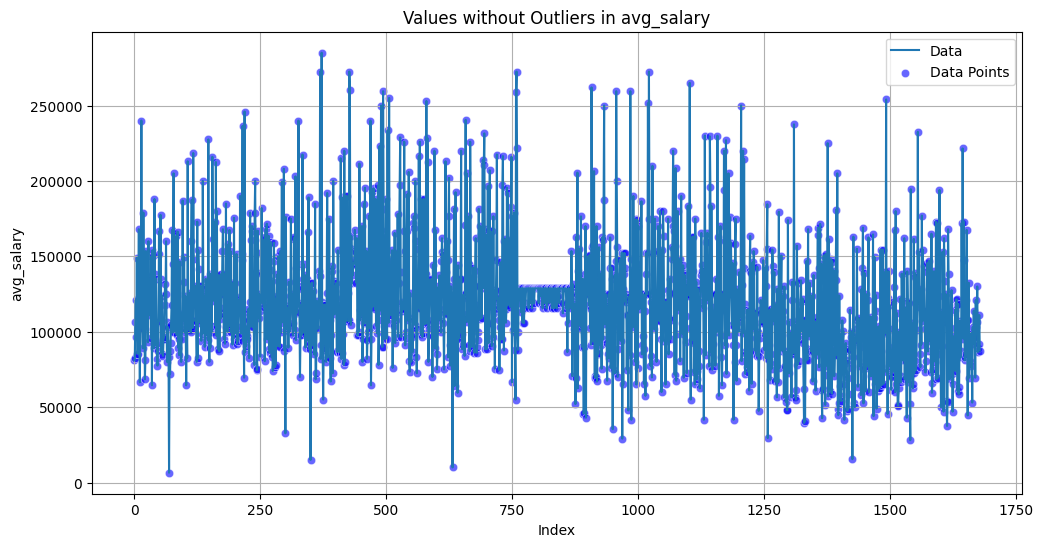

In [23]:
detect_and_plot_outliers(us, 'avg_salary')

In [24]:
indices = [157, 526, 578, 668, 743]

us_avg_outliers = us.loc[indices]

display(us_avg_outliers)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:


data = {
    'state_province': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
        'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
        'Wisconsin', 'Wyoming', 'Remote', 'Unspecified',
        'Alberta', 'British Columbia (Columbia Británica)', 'Manitoba',
        'New Brunswick (Nuevo Brunswick)', 'Newfoundland and Labrador (Terranova y Labrador)',
        'Nova Scotia (Nueva Escocia)', 'Ontario', 'Prince Edward Island (Isla del Príncipe Eduardo)',
        'Quebec', 'Saskatchewan', 'Northwest Territories (Territorios del Noroeste)',
        'Nunavut', 'Yukon'
    ],
    'abbreviation': [
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
        'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
        'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
        'WI', 'WY', 'Remote', 'Unspecified', 'AB', 'BC', 'MB', 'NB', 'NL', 'NS',
        'ON', 'PE', 'QC', 'SK', 'NT', 'NU', 'YT'
    ]
        }

# Crear el DataFrame
locations = pd.DataFrame(data)

locations['id'] = locations.index

columns_order = ['id', 'state_province', 'abbreviation']
locations = locations[columns_order]

# Mostrar el DataFrame resultante
print(locations)



    id                                    state_province abbreviation
0    0                                           Alabama           AL
1    1                                            Alaska           AK
2    2                                           Arizona           AZ
3    3                                          Arkansas           AR
4    4                                        California           CA
..  ..                                               ...          ...
60  60                                            Quebec           QC
61  61                                      Saskatchewan           SK
62  62  Northwest Territories (Territorios del Noroeste)           NT
63  63                                           Nunavut           NU
64  64                                             Yukon           YT

[65 rows x 3 columns]


# Canada 

In [26]:
df1 = pd.read_csv('Dataset_Canada.csv')
df1.head()

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, Llc",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"Business Intelligence Specialist, Ft",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      1653 non-null   object 
 1   job_info       1653 non-null   object 
 2   position       1653 non-null   object 
 3   employer       1653 non-null   object 
 4   city           1653 non-null   object 
 5   province       1653 non-null   object 
 6   skill          1653 non-null   object 
 7   seniority      1653 non-null   object 
 8   work_type      1653 non-null   object 
 9   industry_type  1653 non-null   object 
 10  min_salary     1653 non-null   float64
 11  max_salary     1653 non-null   float64
 12  avg_salary     1653 non-null   float64
dtypes: float64(3), object(10)
memory usage: 168.0+ KB


In [28]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].apply(ftfy.fix_text)

In [29]:
df1['job_title'].value_counts()

job_title
Senior Supply Chain Data Analysts        245
Senior Business Intelligence Analysts    216
Senior Business Analysts                 192
Business Systems Analysts                182
Systems and Data Analysts                169
Senior Data Analysts                     158
Business and Technical Analysts          146
Business and Marketing Analysts          141
Financial and Operational Analysts       139
Database Analysts                         65
Name: count, dtype: int64

In [30]:
title_df = df1[df1['job_title'].str.contains(r'[^\x00-\x7F]', na=False)]
title_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [31]:
position_df = df1[df1['position'].str.contains(r'[^\x00-\x7F]', na=False)]
position_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [32]:
df1['position'].value_counts()

position
Analyst                 713
Business Analyst        298
Data Analyst            215
System Analyst          175
Data Engineer            39
BI Analyst               33
Risk Analyst             27
Developer                27
Data Specialist          21
Lead                     14
Intern                   14
Logistic Analyst         11
Programmer                9
Manager                   8
Quantitative Analyst      7
Data Consultant           7
Data Associate            6
Financial Analyst         6
Data Officer              5
Coordinator               3
Data Architect            3
Other                     3
Statistician              3
Director                  2
Data Scientist            2
Trainer                   1
Executive                 1
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [33]:
employer_df = df1[df1['employer'].str.contains(r'[^\x00-\x7F]', na=False)]
employer_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
679,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒâ©Alis,Richmond,BC,"Power Bi, Html, Power Platform, Excel, Css, Ja...",ANY,In-Person,Others,68960.00,94820.0,81890.000
716,Business and Technical Analysts,V.I.E. Programmer Analyst- H/F/X,Programmer,Sociãƒâ©Tãƒâ© Gãƒâ©Nãƒâ©Rale,Montreal,QC,"Git, Docker, Github, Java, Jira, Postgresql",ANY,In-Person,Others,64123.59,86600.0,75361.795
931,Systems and Data Analysts,Engineering Project Data Analyst,Data Engineer,Cmc Ãæ'€°Lectronique,Montreal,QC,"Jira, Power BI, SQL, Primavera, Tableau",ANY,In-Person,Others,69000.00,80000.0,74500.000
1536,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,BC,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000
1537,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,QC,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000
1538,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,NB,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000


**Nota:**
Los errores de esta columna se integraran en un diccionario con los datos de otras columnas para tratarlos simultáneamente.

In [34]:
city_df = df1[df1['city'].str.contains(r'[^\x00-\x7F]', na=False)]
city_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
1039,Business and Technical Analysts,Analyste De La Chaîne D'Approvisionnement / Su...,Analyst,Altius Spices & Seasonings Inc.,Baie-d'Urfé,QC,"Bilingual, Tableau, Supply chain, ERP systems,...",ANY,In-Person,Others,35000.0,57200.0,46100.0
1050,Business and Technical Analysts,Business Intelligence Lead/Responsable De L'In...,Lead,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, Power BI, JD Edwards, Busi...",ANY,In-Person,Others,52000.0,75000.0,63500.0
1065,Senior Business Intelligence Analysts,Business Intelligence Report Developer/Analyst...,Developer,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Business intel...",ANY,In-Person,Others,68000.0,88300.0,78150.0
1097,Business and Technical Analysts,Kãƒæ'¶Rber Business Analyst/Kãƒæ'¶Rber Analyst...,Business Analyst,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Customer servi...",ANY,In-Person,Others,52000.0,75000.0,63500.0


In [35]:
cities = df1['city'].value_counts()
cities.sort_index()

city
100 Mile House     1
Abbotsford         8
Acheson            1
Alberta            2
Amherst            1
                  ..
Windsor            9
Winnipeg          28
Woodbridge         3
Yellowknife        1
York               1
Name: count, Length: 171, dtype: int64

In [36]:
df1['city'] = df1['city'].replace({
    'Baie-d\'urfe': 'Baie-d\'Urfé',
    'Portage la Prairie': 'Portage La Prairie',
    'Rocky View': 'Rocky View County'
})

**Nota:**
Se reemplazaron las variantes incorrectas o inconsistentes y se dejaron los nombres de las ciudades correctamente estandarizados.

In [37]:
province_df = df1[df1['province'].str.contains(r'[^\x00-\x7F]', na=False)]
province_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [38]:
df1['province'].value_counts()

province
ON       878
BC       220
AB       174
QC       168
Undef     96
MB        36
NS        34
NB        21
SK        16
NL         5
YT         2
PE         1
NT         1
NFL        1
Name: count, dtype: int64

In [39]:
df1['province'] = df1['province'].replace({'Undef': 'Unspecified'})

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [40]:
skill_df = df1[df1['skill'].str.contains(r'[^\x00-\x7F]', na=False)]
skill_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [41]:
seniority_df = df1[df1['seniority'].str.contains(r'[^\x00-\x7F]', na=False)]
seniority_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [42]:
df1['seniority'].value_counts()

seniority
ANY       1262
Senior     330
Mid         35
Junior      26
Name: count, dtype: int64

In [43]:
df1['seniority'] = df1['seniority'].replace({'ANY': 'Undefined'})

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [44]:
work_type_df = df1[df1['work_type'].str.contains(r'[^\x00-\x7F]', na=False)]
work_type_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [45]:
df1['work_type'].value_counts()

work_type
In-Person    1514
Remote        119
Hybrid         20
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [46]:
industry_type_df = df1[df1['industry_type'].str.contains(r'[^\x00-\x7F]', na=False)]
industry_type_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [47]:
df1['industry_type'].value_counts()

industry_type
Others                859
Technology            322
Healthcare            111
Finance               101
Service                52
Consulting             49
Energy                 22
Automotive             22
Education              18
Construction           15
Government             15
Transportation         11
Media                  10
Telecommunications      8
Legal                   7
Insurance               6
Aerospace               6
Real Estate             5
Manufacturing           5
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [48]:
replacements = {
    'ãƒâ©': 'é',  
    'ãƒÂ©': 'é',  
    'ãƒâ§': 'ç',  
    'ãƒâ¦': 'æ',  
    'ãƒâ¢': 'â',  
    'ãƒâ': 'a',   
    '©': '',      
    '¨Ã': '',     
    'ƒæ': '',     
    '¥': '',      
    'â€™': "'",   
    'â€œ': '"',   
    'â€”': '-',   
    'Â': '',     
    '¢': '',     
    'Ã¯': '',    
    'Ã©': 'é',   
    'Ã§': 'ç',   
    'Ã´': 'ô',   
    'Ã¨': 'è',   
    'ã§': 'ç',   
    'ã¢': 'â',
    'Ã’': 'Ô',       
    'Ã‚¬°': '°',     
    'ã’': 'é',        
    'Ã‚': 'é',        
    'Atkinsrã’Ã‚Alis': 'AtkinsRéalis',  # Ejemplo específico
    'SociéTé GéNéRale': 'Société Générale',  # Ejemplo específico
    'Cmc Ã’Ã‚¬°Lectronique': 'Cmc ÔÉ°Electronique', 
}


def reemplace_characters(text, replacements):
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

# aplicar reemplazos en las columnas problematicas
df1['job_info'] = df1['job_info'].apply(lambda x: reemplace_characters(str(x), replacements))
df1['employer'] = df1['employer'].apply(lambda x: reemplace_characters(str(x), replacements))
df1['city'] = df1['city'].apply(lambda x: reemplace_characters(str(x), replacements))

In [49]:
info1_df = df1[df1['job_info'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)] 
info1_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
659,Senior Supply Chain Data Analysts,"Analyste Dã'¬""Tudes / Study Analyst, Real Worl...",Analyst,Iqvia,Kirkland,QC,Excel,Undefined,In-Person,Others,68500.0,87000.0,77750.0
1097,Business and Technical Analysts,Kã'¶Rber Business Analyst/Kã'¶Rber Analyste Éc...,Business Analyst,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Customer servi...",Undefined,In-Person,Others,52000.0,75000.0,63500.0
1121,Business and Technical Analysts,'¿Å€ŒçÃ'¨â'¬¹Ã'®Å¾'®­-†€™Ã…€™¦Ã€ŽâÃ'¯¦Ã'Ã'â...,BI Analyst,Savvypro Edu Inc.,Remote,Unspecified,Agile,Undefined,Remote,Others,104000.0,180000.0,142000.0
1137,Business and Technical Analysts,"Business Systems Analyst, Digital / Analyste, ...",System Analyst,Imperial Tobacco Canada,Montreal,QC,"Azure, Writing skills, DevOps, Python, E-commerce",Undefined,In-Person,Others,44000.0,90000.0,67000.0


In [50]:
info2_df = df1[df1['employer'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)]
info2_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
180,Senior Data Analysts,Senior Data Analyst,Data Analyst,Scene+,Toronto,ON,"Sql, Python, Tableau, Machine Learning",Senior,In-Person,Others,69000.0,86000.0,77500.0
555,Senior Business Analysts,Operations Analyst,Analyst,Tim Hortons | Company #4020653,London,ON,"Sas, Fabric, Excel",Undefined,In-Person,Others,66000.0,84500.0,75250.0
710,Business Systems Analysts,"P&C Insurance Business Analyst, Implementations",Business Analyst,Cognition+,Remote in London,ON,R,Undefined,Remote,Technology,85816.8,91520.0,88668.4
782,Systems and Data Analysts,Expert Data Warehouse / Data Engineer / Data A...,Data Engineer,Thimm Group Gmbh + Co. Kg,Engineer,BC,Undef,Senior,In-Person,Others,76000.0,89440.0,82720.0
894,Senior Data Analysts,Senior Data Analyst,Data Analyst,Scene+,Toronto,ON,"Tableau, SQL, Presentation skills, Machine lea...",Senior,In-Person,Others,43000.0,93000.0,68000.0
931,Systems and Data Analysts,Engineering Project Data Analyst,Data Engineer,Cmc Ãæ'€°Lectronique,Montreal,QC,"Jira, Power BI, SQL, Primavera, Tableau",Undefined,In-Person,Others,69000.0,80000.0,74500.0
1108,Systems and Data Analysts,Expert Data Warehouse / Data Engineer / Data A...,Data Engineer,Thimm Group Gmbh + Co. Kg,Engineer,Unspecified,Data warehouse,Senior,In-Person,Others,47000.0,70000.0,58500.0
1307,Senior Business Analysts,Operations Analyst,Analyst,Tim Hortons | Company #4020653,London,ON,"SQL, SAS",Undefined,In-Person,Others,47000.0,60000.0,53500.0
1577,Business Systems Analysts,"P&C Insurance Business Analyst, Implementations",Business Analyst,Cognition+,London,ON,"System administration, Sales, Customer service...",Undefined,In-Person,Technology,86000.0,88000.0,87000.0


In [51]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df1['employer'] = df1['employer'].apply(remove_numbers)

# reemplazar caracteres
df1['employer'] = df1['employer'].str.replace(r'[+\|#]', '', regex=True)


In [52]:
info3_df = df1[df1['city'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)]
info3_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


# Merge

In [53]:
us.sample(5)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
1149,Jpmorgan Chase & Co,4.0,"Data Analytics Solutions, Associate","Newark, DE",Newark,DE,data analyst,junior,74000.0,110000.0,92000.0,JOB DESCRIPTION Step into a dynamic role at...,Banca y Servicios de crédito,Finanzas,['The Treasury and the Chief Investment Office...,[],['Act as Product Owner for low code workflows ...
870,The Insurance Center,2.7,Associate Stop Loss Underwriter,"Onalaska, WI",Onalaska,WI,associate stop loss underwriter,junior,57000.0,84000.0,70500.0,The Associate Stop Loss Underwriter is respons...,Aseguradoras y sociedades de inversión,Seguros,['The Associate Stop Loss Underwriter is respo...,[],['Tech savvy with data visualization experienc...
1177,Icf,3.6,Data Scientist,"Reston, VA",Reston,VA,data scientist,junior,113000.0,191000.0,152000.0,ICF is looking for a Senior Data Scientist to ...,Consultorías empresariales,Administración y consultoría,"['In this role, you’ll utilize your expertise ...",[],['This position is open to senior- and princip...
794,Interimage,3.9,Software Engineer,United States,Unspecified,Remote,software engineer,junior,95000.0,143000.0,119000.0,NaN,NaN,NaN,NaN,NaN,NaN
1015,Tresume,4.0,Data Analyst,"Jersey City, NJ",Jersey City,NJ,data analyst,unspecified,55000.0,60000.0,57500.0,Data analyst: Job description- - Collaborati...,No Especifica,No Especifica,['Data analyst: Job description- - Collabora...,[],[]


In [54]:
df1.sample(5)

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
418,Business Systems Analysts,"Senior Business Analyst, Technology Architecture",Data Architect,Cibc,Toronto,ON,Undef,Senior,In-Person,Others,85816.8,91520.0,88668.4
952,Senior Business Analysts,Business Intelligence Analyst,BI Analyst,Autodesk,Toronto,ON,"Tableau, Power BI, Data modeling, Business int...",Undefined,In-Person,Others,80000.0,124000.0,102000.0
1485,Senior Business Analysts,Senior Business Analyst,Business Analyst,Ehealth Saskatchewan,Saskatchewan,SK,"Project management, IT, Business requirements",Senior,In-Person,Healthcare,88171.2,107286.4,97728.8
1351,Business Systems Analysts,"Business Analyst, Commercial Services (Commerc...",Business Analyst,Firstontario Credit Union,St. Catharines,ON,Undef,Undefined,In-Person,Technology,64000.0,64000.0,64000.0
994,Business and Technical Analysts,Developpeur Power-Bi Sénior,Other,Cgi,Montreal,QC,"Jira, Power BI, Agile, Cloud computing, Chef",Undefined,In-Person,Others,63000.0,120000.0,91500.0


In [55]:

rename_dict = {
    'employer': 'company',
    'province': 'state',
    'industry_type' : 'industry',
    
}


df1_renamed = df1.rename(columns=rename_dict)

# Mostrar los nombres de columnas de df2 después de renombrar
print(df1_renamed.columns)


Index(['job_title', 'job_info', 'position', 'company', 'city', 'state',
       'skill', 'seniority', 'work_type', 'industry', 'min_salary',
       'max_salary', 'avg_salary'],
      dtype='object')


In [56]:

job_postings = pd.concat([us, df1_renamed], ignore_index=True, sort=False)


print(job_postings.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           3333 non-null   object 
 1   company_score     1680 non-null   float64
 2   job_title         3333 non-null   object 
 3   location          1680 non-null   object 
 4   city              3333 non-null   object 
 5   state             3333 non-null   object 
 6   position          3333 non-null   object 
 7   seniority         3333 non-null   object 
 8   min_salary        3333 non-null   float64
 9   max_salary        3333 non-null   float64
 10  avg_salary        3333 non-null   float64
 11  job_info          2463 non-null   object 
 12  industry          2463 non-null   object 
 13  sector            810 non-null    object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [57]:
job_postings['company_score'] = job_postings['company_score'].fillna('Unspecified')

In [58]:
job_postings['company_score'].isna().sum()

0

In [59]:
job_postings['job_info'] = job_postings['job_info'].fillna('Unspecified')

In [60]:
job_postings['industry'] = job_postings['industry'].fillna('Unspecified')

In [61]:
job_postings['industry'] = job_postings['industry'].replace('No Especifica', 'Unspecified')

In [62]:
job_postings['sector'] = job_postings['sector'].fillna('Unspecified')

In [63]:
job_postings['sector'] = job_postings['sector'].replace('No Especifica', 'Unspecified')

In [64]:
job_postings['work_type'] = job_postings['work_type'].fillna('Unspecified')

In [65]:
job_postings['location'] = job_postings['location'].fillna('Unspecified')

In [66]:
display(job_postings.sample(5))

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements,skill,work_type
1025,Crc Management Co Llc,2.9,Junior Data Analyst,"Rego Park, NY",Rego Park,NY,data analyst,junior,70000.00,85000.0,77500.00,Job Summary: Join the largest U.S. operator o...,Lavandería y tintorería,Servicios personales al consumidor,['Laundry Capital pioneered the Laundromat “su...,[],"[""Qualifications Bachelor's Degree in Busines...",NaN,Unspecified
1542,Liberty Mutual Insurance,3.3,"Director Ii, Data Science - Grs Predictive Ana...","Chicago, IL",Chicago,IL,data scientist,junior,150000.00,239000.0,194500.00,Advance your career at Liberty Mutual Insuranc...,Insurance Carriers,Insurance,['This role requires expertise in a broad rang...,[],['Regularly engage with the data science and a...,NaN,Unspecified
649,Tickets.Com,5.0,"Software Integration Engineer, Junior","Fort Meade, MD",Fort Meade,MD,"software integration engineer, junior",junior,180000.00,260000.0,220000.00,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,Unspecified
307,Thatgamecompany,3.6,Senior Software Engineer,"Santa Monica, CA",Santa Monica,CA,software engineer,senior,116000.00,150000.0,133000.00,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,Unspecified
1709,Mackenzie Financial Corporation,Unspecified,Senior Business Analysts,Unspecified,Greater Toronto Area,ON,System Analyst,Senior,30240.56,57200.0,43720.28,Senior Systems Analyst,Finance,Unspecified,NaN,NaN,NaN,Sql,In-Person


In [67]:
job_postings['seniority'] = job_postings['seniority'].replace('senior', 'Senior')

job_postings['seniority'] = job_postings['seniority'].replace('Undefined', 'unspecified')

job_postings['seniority'] = job_postings['seniority'].replace('junior', 'Junior')

job_postings['seniority'] = job_postings['seniority'].replace('unspecified', 'Unspecified')

In [68]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           3333 non-null   object 
 1   company_score     3333 non-null   object 
 2   job_title         3333 non-null   object 
 3   location          3333 non-null   object 
 4   city              3333 non-null   object 
 5   state             3333 non-null   object 
 6   position          3333 non-null   object 
 7   seniority         3333 non-null   object 
 8   min_salary        3333 non-null   float64
 9   max_salary        3333 non-null   float64
 10  avg_salary        3333 non-null   float64
 11  job_info          3333 non-null   object 
 12  industry          3333 non-null   object 
 13  sector            3333 non-null   object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [69]:
industry_translation = {
    'Aseguradoras y sociedades de inversión': 'Insurance Carriers & Investment Societies',
    'Banca y Servicios de crédito': 'Banks & Credit Services',
    'Desarrollo de software': 'Software Development',
    'Fabricación de productos químicos': 'Chemical Product Manufacturing',
    'Universidades y escuelas profesionales': 'Education & Professional Training',
    'Bufetes de abogados': 'Legal',
    'Aeroespacial y defensa': 'Aerospace & Defense',
    'Tiendas de muebles y de artículos para el hogar': 'Furniture & Home Goods Stores',
    'Selección de personal y Subcontratación': 'Staffing & Outsourcing',
    'Videojuegos': 'Video Games',
    'Hospitales y Centros de salud': 'Hospitals & Health Care Centers',
    'Consultorías empresariales': 'Consulting',
    'Fabricación de productos de consumo': 'Consumer Products Manufacturing',
    'Construcción': 'Construction',
    'Software empresarial y soluciones de red': 'Enterprise Software & Network Solutions',
    'Organismos estatales y regionales': 'Federal & State Agencies',
    'Publicidad y Relaciones públicas': 'Advertising & Public Relations',
    'Internet y Servicios web': 'Telecommunications Services',
    'Soporte informático': 'IT Services',
    'Compañías de seguros': 'Insurance Companies',
    'Electricidad y Servicios públicos': 'Electricity & Public Services',
    'Tiendas de accesorios personales y de belleza': 'Beauty & Personal Accessories Stores',
    'Fabricación de maquinaria': 'Industrial Manufacturing',
    'Hospitales y servicios de atención médica': 'Hospitals & Health Care Centers',
    'Biotecnología e industria farmacéutica': 'Biotech & Pharmaceuticals',
    'Venta al por mayor': 'Wholesale',
    'Belleza y Bienestar': 'Health, Beauty, & Fitness',
    'Organismos nacionales': 'National Agencies',
    'Consultoría en recursos humanos': 'Human Resources Consulting',
    'Otros tipos de tiendas minoristas': 'Other Retail Stores',
    'Producción de alimentos y bebidas': 'Food & Beverage Manufacturing',
    'Desarrollo de equipos informáticos': 'Computer Hardware Development',
    'Tiendas de artículos deportivos': 'Sporting Goods Stores',
    'Agencias de viajes': 'Travel Agencies',
    'Investigación y desarrollo': 'Research & Development',
    'Servicios de telecomunicaciones': 'Telecommunications Services',
    'Renta de productos de consumo': 'Consumer Product Rental',
    'Procesamiento de transacciones financieras': 'Banks & Credit Services',
    'Lavandería y tintorería': 'Laundry & Dry Cleaning',
    'Deportes y actividades recreativas': 'Sports & Recreational Activities',
    'Gestión de activos e Inversiones': 'Investment Banking & Asset Management',
    'Legal': 'Legal',
    'Fabricación de productos electrónicos': 'Electronic Products Manufacturing',
    'Educación y Formación profesional': 'Education & Professional Training',
    'Farmacias y tiendas de productos para la salud': 'Pharmacies & Health Product Stores',
    'Producción cinematográfica': 'Motion Picture Production & Distribution',
    'Proveedores de cable, Internet y teléfono': 'Telecommunications Services',
    'Paquetería y Mensajería': 'Package & Courier Services',
    'Servicios comunitarios': 'Community Services',
    'Ocio y Cultura': 'Entertainment & Culture',
    'Manufactura de productos para el cuidado de la salud': 'Health Care Products Manufacturing',
    'Restaurantes y Cafeterías': 'Restaurants & Cafes',
    'Supermercados': 'Supermarkets',
    'Juegos de apuestas': 'Gambling',
    'Servicios jurídicos': 'Legal',
    'Otros': 'Others',
    '-1': 'Unspecified', 

    # Agrega más traducciones si es necesario
}


In [70]:
job_postings['industry'] = job_postings['industry'].replace(industry_translation)

In [71]:
industry_clean = {
    'Aerospace' : 'Aerospace & Defense', 
    'Banks & Credit Unions' : 'Banks & Credit Services',
    'Colleges & Universities' : 'Education',
    'Computer Hardware Development' : 'Computer Hardware & Software', 
    'Education & Professional Training' : 'Education', 
    'Education Training Services' : 'Education', 
    'Federal & State Agencies' : 'Federal Agencies',
    'Health Care Products Manufacturing' : 'Healthcare',
    'Health Care Services & Hospitals' : 'Healthcare', 
    'Health, Beauty, & Fitness' : 'Healthcare', 
    'Insurance Agencies & Brokerages' : 'Insurance',
    'Insurance Carriers' :'Insurance',
    'Insurance Carriers & Investment Societies' : 'Insurance',
    'Insurance Companies' : 'Insurance',
    'Internet' : 'Telecommunications', 
    'It Services' : 'IT Services', 
    'K-12 Education' : 'Education',
    'Telecommunications Manufacturing' : 'Telecommunications',
    'Telecommunications Services' : 'Telecommunications',
    'Transportation Equipment Manufacturing' : 'Transportation', 
    'Transportation Management' : 'Transportation', 
    'Travel Agencies' : 'Travel', 
    'Financial Transaction Processing' : 'Finance'

}


In [72]:
job_postings['industry'] = job_postings['industry'].replace(industry_clean)

In [73]:
job_postings['sector'].unique()

array(['Unspecified', 'Seguros', 'Finanzas',
       'Tecnologías de la información', 'Manufactura', 'Educación',
       'Legal', 'Aeroespacial y defensa',
       'Ventas al mayoreo y al menudeo', 'Recursos humanos',
       'Audiovisual y medios de comunicación', 'Salud',
       'Administración y consultoría',
       'Servicios de construcción, reparación y mantenimiento',
       'Gobierno y administración pública',
       'Energía, minería e infraestructura pública',
       'Farmacéutica y biotecnología',
       'Servicios personales al consumidor',
       'Hoteles y complejos turísticos', 'Telecomunicaciones',
       'Artes y entretenimiento', 'Transporte y logística',
       'ONG y Organizaciones sin fines de lucro',
       'Restaurantes y servicios de comidas', 'Aerospace & Defense',
       'Health Care', 'Business Services', 'Oil, Gas, Energy & Utilities',
       'Real Estate', 'Finance', 'Information Technology', 'Retail',
       'Biotech & Pharmaceuticals', 'Media', 'Insurance',


In [74]:
sector_translation = {
    'Seguros': 'Insurance',
    'Finanzas': 'Finance',
    'Tecnologías de la información': 'Information Technology',
    'Manufactura': 'Manufacturing',
    'Aeroespacial y defensa': 'Aerospace & Defense',
    'Ventas al mayoreo y al menudeo': 'Wholesale & Retail',
    'Recursos humanos': 'Human Resources',
    'Audiovisual y medios de comunicación': 'Media & Entertainment',
    'Salud': 'Health Care',
    'Administración y consultoría': 'Business Services',
    'Servicios de construcción, reparación y mantenimiento': 'Construction, Repair & Maintenance',
    'Gobierno y administración pública': 'Government & Public Administration',
    'Energía, minería e infraestructura pública': 'Energy, Mining & Public Infrastructure',
    'Farmacéutica y biotecnología': 'Biotech & Pharmaceuticals',
    'Servicios personales al consumidor': 'Consumer Services',
    'Hoteles y complejos turísticos': 'Hotels & Resorts',
    'Telecomunicaciones': 'Telecommunications',
    'Artes y entretenimiento': 'Arts & Entertainment',
    'Transporte y logística': 'Transportation & Logistics',
    'ONG y Organizaciones sin fines de lucro': 'Non-Profit Organizations',
    'Restaurantes y servicios de comidas': 'Restaurants & Food Services',
    'Aerospace & Defense': 'Aerospace & Defense',
    'Health Care': 'Health Care',
    '-1': 'Unspecified',
}


In [75]:
job_postings['sector'] = job_postings['sector'].replace(sector_translation)


In [76]:
categorias = {
    'software engineer': 'Software Engineer',
    'developer': 'Software Engineer',  # Abarca todos los tipos de desarrollo de software
    'backend developer': 'Software Engineer',
    'frontend developer': 'Web Developer',
    'full stack developer': 'Software Engineer',
    'full stack engineer': 'Software Engineer',
    'devops': 'DevOps Engineer',
    'site reliability': 'DevOps Engineer',
    'qa': 'Quality Assurance (QA)',
    'test engineer': 'Quality Assurance (QA)',
    'data scientist': 'Data Scientist',
    'machine learning': 'AI/ML Engineer',
    'ai/ml': 'AI/ML Engineer',
    'data engineer': 'Data Engineer',
    'data architect': 'Data Engineer',
    'cloud engineer': 'Cloud Engineer',
    'technical support': 'Technical Support',
    'network engineer': 'Network Engineer',
    'business analyst': 'Business Analyst',
    'product manager': 'Product Manager',
    'it manager': 'IT Manager',
    'scientist': 'Scientist',
    'research scientist': 'Scientist',
    'statistician': 'Data Scientist',
    'analyst': 'Data Analyst',
    'systems engineer': 'System Engineer',
    'programmer': 'Software Engineer',
    'web developer': 'Web Developer',
    'architect': 'Data Engineer',
    'support engineer': 'Technical Support',
    'manager': 'IT Manager'
}

def asignar_categoria(job_title):
    for keyword, categoria in categorias.items():
        if keyword in job_title.lower():
            return categoria
    return 'Other'  


job_postings['position'] = job_postings['position'].apply(asignar_categoria)



In [77]:
job_postings['position'].value_counts()

position
Data Analyst              1349
Software Engineer          749
Data Scientist             354
Business Analyst           298
Other                      246
Data Engineer              142
Scientist                   76
AI/ML Engineer              31
DevOps Engineer             22
IT Manager                  19
Cloud Engineer              15
Quality Assurance (QA)      12
System Engineer              9
Product Manager              6
Technical Support            5
Name: count, dtype: int64

# Tablas para base de datos

In [78]:



job_postings['id'] = job_postings.index + 1

# Tabla industry_type
industry_type = job_postings[['industry']].drop_duplicates().reset_index(drop=True)
industry_type['id'] = industry_type.index + 1
industry_type.rename(columns={'industry': 'type'}, inplace=True)

# Tabla position_types
position_types = job_postings[['position']].drop_duplicates().reset_index(drop=True)
position_types['id'] = position_types.index + 1

# 3abla seniority_levels
seniority_levels = job_postings[['seniority']].drop_duplicates().reset_index(drop=True)
seniority_levels['id'] = seniority_levels.index + 1
seniority_levels.rename(columns={'seniority': 'level'}, inplace=True)

# Tabla locations
locations = pd.DataFrame({
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
              'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
              'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
              'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
              'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
              'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
              'Wisconsin', 'Wyoming', 'Remote', 'Unspecified', 
              'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 
              'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 
              'Quebec', 'Saskatchewan', 'Northwest Territories', 'Nunavut', 'Yukon', 'Aguadilla'],
    'abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
                     'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 
                     'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
                     'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
                     'WI', 'WY', 'Remote', 'Unspecified', 'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 
                     'ON', 'PE', 'QC', 'SK', 'NT', 'NU', 'YT', 'PR'],
                     })
locations['id'] = locations.index + 1




In [79]:
display(industry_type) 

,type,id
0,Unspecified,1
1,Insurance,2
2,Banks & Credit Services,3
3,Software Development,4
4,Chemical Product Manufacturing,5
...,...,...
74,Media,75
75,Government,76
76,Manufacturing,77
77,Retail,78


In [80]:
display(position_types) 

,position,id
0,Software Engineer,1
1,Technical Support,2
2,Other,3
3,Quality Assurance (QA),4
4,DevOps Engineer,5
5,System Engineer,6
6,Data Analyst,7
7,Cloud Engineer,8
8,AI/ML Engineer,9
9,Data Engineer,10


In [81]:
display(seniority_levels)

,level,id
0,Junior,1
1,Unspecified,2
2,Senior,3
3,Mid,4


In [82]:

locations['country'] = locations['id'].apply(lambda x: 'USA' if x <= 50 else 
                                             ('Remote' if x == 51 else 
                                             ('Unspecified' if x == 52 else 
                                             ('Canada' if x <= 65 else 'Puerto Rico'))))



In [83]:
display(locations.tail(20)) 

,state,abbreviation,id,country
46,Washington,WA,47,USA
47,West Virginia,WV,48,USA
48,Wisconsin,WI,49,USA
49,Wyoming,WY,50,USA
50,Remote,Remote,51,Remote
51,Unspecified,Unspecified,52,Unspecified
52,Alberta,AB,53,Canada
53,British Columbia,BC,54,Canada
54,Manitoba,MB,55,Canada
55,New Brunswick,NB,56,Canada


In [84]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         66 non-null     object
 1   abbreviation  66 non-null     object
 2   id            66 non-null     int64 
 3   country       66 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [85]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           3333 non-null   object 
 1   company_score     3333 non-null   object 
 2   job_title         3333 non-null   object 
 3   location          3333 non-null   object 
 4   city              3333 non-null   object 
 5   state             3333 non-null   object 
 6   position          3333 non-null   object 
 7   seniority         3333 non-null   object 
 8   min_salary        3333 non-null   float64
 9   max_salary        3333 non-null   float64
 10  avg_salary        3333 non-null   float64
 11  job_info          3333 non-null   object 
 12  industry          3333 non-null   object 
 13  sector            3333 non-null   object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [86]:
seniority_dict = dict(zip(seniority_levels['level'], seniority_levels['id']))

job_postings['seniority'] = job_postings['seniority'].map(seniority_dict)


In [87]:
job_postings['seniority'].unique()

array([1, 2, 3, 4], dtype=int64)

In [88]:
industry_dict = dict(zip(industry_type['type'], industry_type['id']))

job_postings['industry'] = job_postings['industry'].map(industry_dict)

In [89]:
job_postings['industry'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64)

In [90]:
position_dict = dict(zip(position_types['position'], position_types['id']))

job_postings['position'] = job_postings['position'].map(position_dict)

In [91]:
job_postings['position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [92]:
job_postings['state'] = job_postings['state'].replace('DC', 'WA')

In [93]:

job_postings.at[2976, 'location'] = 'Newfoundland and Labrador (Terranova y Labrador)'
job_postings.at[2976, 'city'] = 'Newfoundland and Labrador (Terranova y Labrador)'
job_postings.at[2976, 'state'] = 'NL'


In [94]:
locations_dict = dict(zip(locations['abbreviation'], locations['id']))

job_postings['state'] = job_postings['state'].map(locations_dict)

In [95]:
job_postings['state'].unique()

array([46, 51, 33,  5, 43, 32, 10, 22, 21, 66, 23,  9, 47, 52, 38, 20, 44,
       13, 15,  3, 35, 48, 45,  7, 49, 42, 24, 37,  8, 30, 14, 39,  1,  6,
       31,  4, 12, 27, 25, 40, 29, 17, 36, 16, 11, 28, 50, 34, 18, 59, 54,
       53, 62, 61, 60, 56, 58, 55, 57, 65, 63], dtype=int64)

In [96]:
new_orden = ['id', 'job_title', 'job_info', 'position', 'company', 'city', 'state', 'skills', 'seniority', 'work_type', 'industry', 'min_salary', 'max_salary', 'avg_salary', 'company_score', 'sector', 'responsibilities', 'requirements']  # Reemplaza con el orden deseado
job_postings = job_postings[new_orden]

In [97]:
new_columns_jobs = {'position' : 'position_type_id',
                    'seniority' : 'seniority_level_id', 
                    'industry' : 'industry_type_id', 
                    'responsibilities' : 'responsabilities', 
                    'state' : 'location_id'
                    }

job_postings = job_postings.rename(columns=new_columns_jobs)

In [98]:
job_postings.sample(20)

,id,job_title,job_info,position_type_id,company,city,location_id,skills,seniority_level_id,work_type,industry_type_id,min_salary,max_salary,avg_salary,company_score,sector,responsabilities,requirements
2592,2593,Senior Data Analysts,Data Analyst,7,Canadian Nuclear Laboratories,Port Hope,59,NaN,2,In-Person,71,55000.00,71000.00,63000.000,Unspecified,Unspecified,NaN,NaN
873,874,Oncology Nurse Navigator,Cell Therapy Navigators (Oncology Nurse Naviga...,3,Inizio Engage,Portland,37,['You will be responsible for building strong ...,1,Unspecified,1,90000.00,113000.00,101500.000,3.6,Unspecified,[],['Inizio Engage is looking to build a team of ...
2376,2377,Business and Technical Analysts,DéVeloppeur-Analyste Power Bi,7,Airmedic,Saint-Hubert,61,NaN,2,In-Person,26,64123.59,86600.00,75361.795,Unspecified,Unspecified,NaN,NaN
1098,1099,Territory Business Manager,Inizio Engage has partnered with a Top 10 Glob...,13,Inizio Engage,Los Angeles,5,['Competitive compensation Excellent Benefi...,1,Unspecified,1,103930.61,145632.17,124723.920,3.6,Unspecified,[],['Bachelor’s Degree 2+ years of experience ...
2818,2819,Financial and Operational Analysts,Pricing Analyst,7,Staples,Mississauga,59,NaN,2,In-Person,71,50000.00,76458.00,63229.000,Unspecified,Unspecified,NaN,NaN
2602,2603,Senior Business Intelligence Analysts,Data And Business Intelligence Analyst,7,University Of Toronto,Toronto,59,NaN,2,In-Person,72,85000.00,93000.00,89000.000,Unspecified,Unspecified,NaN,NaN
2287,2288,Business Systems Analysts,Business Systems Analyst,7,Infoblox Canada Ltd.,Burnaby,54,NaN,2,In-Person,71,108347.20,108347.20,108347.200,Unspecified,Unspecified,NaN,NaN
1859,1860,Business and Marketing Analysts,Business Analyst,15,Tripninja,Remote,52,NaN,2,Remote,71,80000.00,90000.00,85000.000,Unspecified,Unspecified,NaN,NaN
2930,2931,Database Analysts,"Analyst, Database",7,Aarorn Technologies Inc.,Guelph,59,NaN,2,In-Person,72,87360.00,87360.00,87360.000,Unspecified,Unspecified,NaN,NaN
2661,2662,Business and Technical Analysts,Marketing Data Analyst/Analyste Des Données Ma...,7,Playground,Canada,52,NaN,2,In-Person,71,64123.59,86600.00,75361.795,Unspecified,Unspecified,NaN,NaN


# Valores atipicos 

Detected outliers in 'min_salary':
157     295000.0
334     215000.0
469     240000.0
506     230000.0
526     343000.0
528     218400.0
578     310000.0
580     213000.0
668     300000.0
743     248000.0
758     234000.0
760     222000.0
908     214000.0
933     250000.0
1020    220000.0
1103    212000.0
1205    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 3333
Data after removing outliers: 3316


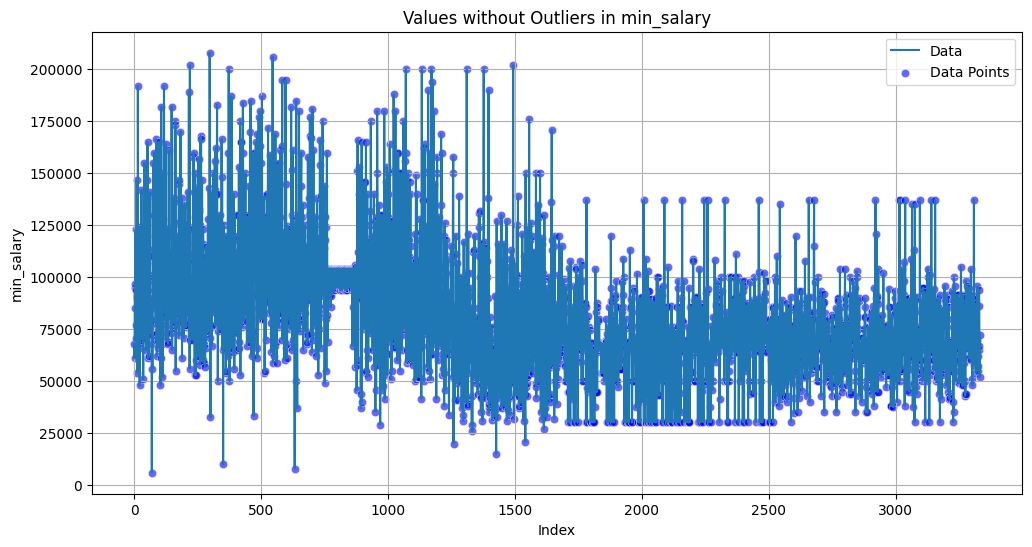

In [99]:
detect_and_plot_outliers(job_postings, 'min_salary')

In [100]:
indices_jobs = [157, 334, 469, 506, 526, 528, 578, 580, 668, 743, 758, 760, 908, 933, 1020, 1103, 1205]

jobs_min_outliers = job_postings.loc[indices_jobs]

display(jobs_min_outliers)

,id,job_title,job_info,position_type_id,company,city,location_id,skills,seniority_level_id,work_type,industry_type_id,min_salary,max_salary,avg_salary,company_score,sector,responsabilities,requirements
157,158,Research Software Engineer,Unspecified,1,Intuitive Machines Llc,Houston,43,NaN,1,Unspecified,1,295000.0,440000.0,367500.0,3.8,Unspecified,NaN,NaN
334,335,Software Engineers,Unspecified,1,Kasmo Cloud Solutions,Suwanee,10,NaN,1,Unspecified,1,215000.0,220000.0,217500.0,4.0,Unspecified,NaN,NaN
469,470,Associate Software Engineer,Unspecified,1,Aci Worldwide,Lenexa,16,NaN,1,Unspecified,1,240000.0,240000.0,240000.0,4.0,Unspecified,NaN,NaN
506,507,Software Engineering Co-Op_Summer 2025,Unspecified,1,"Kaseware, Inc.",Louisville,17,NaN,1,Unspecified,1,230000.0,280000.0,255000.0,4.1,Unspecified,NaN,NaN
526,527,Senior Software Engineer,Unspecified,1,Boeing,Washington,47,NaN,3,Unspecified,1,343000.0,637000.0,490000.0,4.0,Unspecified,NaN,NaN
528,529,Entry Level Support Equipment Software Engineer,Unspecified,1,Uber,Unspecified,52,NaN,1,Unspecified,1,218400.0,239200.0,228800.0,3.9,Unspecified,NaN,NaN
578,579,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...",Unspecified,1,Intel,Brookfield,49,NaN,1,Unspecified,1,310000.0,465000.0,387500.0,5.0,Unspecified,NaN,NaN
580,581,Software Engineer / Simulation - Virtual Proto...,Unspecified,1,Daikin Comfort Technologies Mfg Lp,San Jose,5,NaN,1,Unspecified,1,213000.0,293000.0,253000.0,4.3,Unspecified,NaN,NaN
668,669,Software Engineer - Camera (Technical Leadership),Unspecified,1,Workday,Redmond,47,NaN,3,Unspecified,1,300000.0,450000.0,375000.0,4.0,Unspecified,NaN,NaN
743,744,Software Engineer (Onsite),Unspecified,1,Teradyne,Columbia,20,NaN,1,Unspecified,1,248000.0,385000.0,316500.0,3.6,Unspecified,NaN,NaN


In [101]:
job_postings = job_postings.drop(indices_jobs)

Detected outliers in 'max_salary':
369     385000.0
372     370000.0
427     385000.0
428     337000.0
447     306000.0
490     323000.0
494     339000.0
536     348000.0
567     348000.0
658     321000.0
667     348000.0
759     385000.0
957     339000.0
985     339000.0
1022    357000.0
1493    306000.0
Name: max_salary, dtype: float64
Data before removing outliers: 3316
Data after removing outliers: 3300


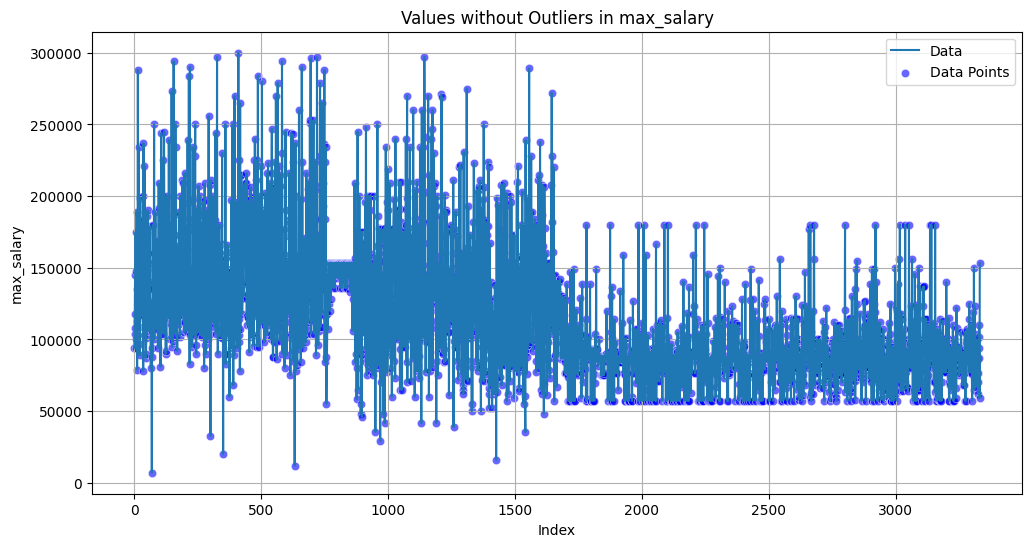

In [102]:
detect_and_plot_outliers(job_postings, 'max_salary')

In [103]:
indices_jobs = [369, 372, 427, 428, 490, 494, 536, 567, 658, 667, 759, 957, 985, 1022]

jobs_max_outliers = job_postings.loc[indices_jobs]

display(jobs_max_outliers)

,id,job_title,job_info,position_type_id,company,city,location_id,skills,seniority_level_id,work_type,industry_type_id,min_salary,max_salary,avg_salary,company_score,sector,responsabilities,requirements
369,370,Video Software Engineer,Unspecified,1,Snc,Lexington,21,NaN,1,Unspecified,1,160000.0,385000.0,272500.0,2.8,Unspecified,NaN,NaN
372,373,Devops Engineer,Unspecified,5,Teamups,Newtown Square,38,NaN,1,Unspecified,1,200000.0,370000.0,285000.0,4.4,Unspecified,NaN,NaN
427,428,Front-End Developer,Unspecified,1,Qinetiq Us,Burr Ridge,13,NaN,2,Unspecified,1,160000.0,385000.0,272500.0,3.9,Unspecified,NaN,NaN
428,429,Solutions Engineer,Unspecified,3,Caterpillar,Unspecified,51,NaN,1,Unspecified,1,184000.0,337000.0,260500.0,4.0,Unspecified,NaN,NaN
490,491,Senior Software Engineer I,Unspecified,1,Boeing,Houston,43,NaN,3,Unspecified,1,177000.0,323000.0,250000.0,4.6,Unspecified,NaN,NaN
494,495,Staff Software Engineer (Remote),Unspecified,1,Bytedance,Texas,43,NaN,1,Unspecified,1,180000.0,339000.0,259500.0,3.6,Unspecified,NaN,NaN
536,537,Software Engineer,Unspecified,1,Federal Reserve Bank Of Dallas,Baltimore,20,NaN,1,Unspecified,1,104000.0,348000.0,226000.0,3.5,Unspecified,NaN,NaN
567,568,Full-Stack Software Engineer – Lmts / Pmts,Unspecified,1,Honeywell,San Francisco,5,NaN,1,Unspecified,1,104000.0,348000.0,226000.0,3.6,Unspecified,NaN,NaN
658,659,"Software Dev Engineer - Machine Learning Apps,...",Unspecified,9,Ford Motor Company,Cupertino,5,NaN,1,Unspecified,1,160000.0,321000.0,240500.0,4.4,Unspecified,NaN,NaN
667,668,Software Performance Engineer,Unspecified,3,Yellow Duck Technologies Inc.,North Reading,21,NaN,1,Unspecified,1,104000.0,348000.0,226000.0,4.3,Unspecified,NaN,NaN


In [104]:
job_postings = job_postings.drop(indices_jobs)

Detected outliers in 'avg_salary':
14      240000.0
219     246000.0
326     240000.0
1493    254000.0
Name: avg_salary, dtype: float64
Data before removing outliers: 3302
Data after removing outliers: 3298


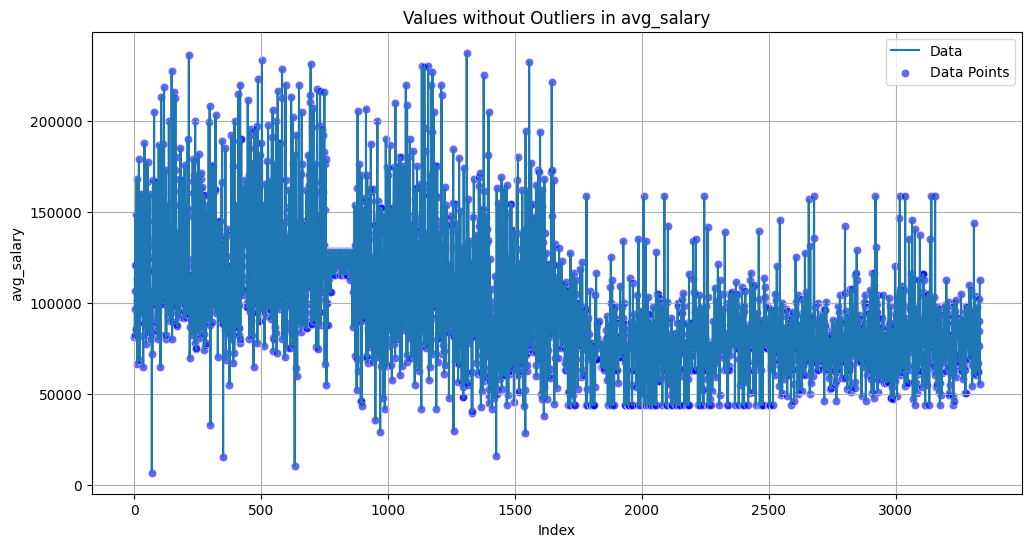

In [105]:
detect_and_plot_outliers(job_postings, 'avg_salary')

# Costo de vida USA


In [106]:
#costo de vida 
df2 = pd.read_csv('Dataset_cost_of_living_US.csv')
df2.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [107]:
df2[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']] = df2[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']].round(2)

In [108]:
df2.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.73,3454.92,10829.17,5737.48,4333.81,0.00,6392.95,39254.05,73010.41
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50,5091.71,11588.19,8659.56,6217.46,6147.83,7422.08,57194.33,73010.41
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50,7460.20,12361.78,11581.63,7075.66,15824.69,9769.56,76141.03,73010.41
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15,9952.24,13452.19,14503.71,9134.36,18802.19,13101.70,94203.53,73010.41
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15,12182.21,13744.60,17425.79,9942.36,18802.19,13469.22,100823.52,73010.41


In [109]:
df2['area_name'].value_counts()

area_name
Atlanta-Sandy Springs-Roswell, GA HUD Metro FMR Area             240
Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area     200
Richmond, VA MSA                                                 170
Virginia Beach-Norfolk-Newport News, VA-NC HUD Metro FMR Area    150
St. Louis, MO-IL HUD Metro FMR Area                              130
                                                                ... 
Monroe County, KY                                                 10
Montgomery County, KY                                             10
Morgan County, KY                                                 10
Muhlenberg County, KY                                             10
Weston County, WY                                                 10
Name: count, Length: 2561, dtype: int64

In [110]:
df2['area_name'] = df2['area_name'].str.split(',').str[0]

In [111]:
df2['family_member_count'].value_counts()

family_member_count
1p0c    3142
1p1c    3142
1p2c    3142
1p3c    3142
1p4c    3142
2p0c    3142
2p1c    3142
2p2c    3142
2p3c    3142
2p4c    3142
Name: count, dtype: int64

In [112]:
df2[['parents', 'children']] = df2['family_member_count'].str.extract(r'(\d)p(\d)c')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null

In [113]:
df2 = df2.astype({
    'parents':'int64',
    'children':'int64'
})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null

In [114]:
df2 = df2.round(2)


In [115]:
df2['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [116]:
ind = [3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199]

subset = df2.iloc[ind]

display(subset)

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,parents,children
3190,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,1p0c,16642.28,4492.43,5660.74,4933.48,7657.94,0.00,6929.51,46316.38,116607.39,1,0
3191,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,1p1c,19414.16,6620.75,6384.58,8266.32,9433.47,19994.33,14165.31,84278.92,116607.39,1,1
3192,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,1p2c,19414.16,9700.50,7528.00,11599.16,10549.39,42045.96,24911.74,125748.91,116607.39,1,2
3193,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,1p3c,24891.92,12940.90,8171.79,14932.00,13708.32,48831.09,31384.30,154860.31,116607.39,1,3
3194,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,1p4c,24891.92,15840.54,8554.63,18264.84,14758.98,48831.09,32334.15,163476.14,116607.39,1,4
3195,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,2p0c,17027.26,8236.12,7206.08,9866.96,9153.92,0.00,8563.61,60053.96,116607.39,2,0
3196,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,2p1c,19414.16,10250.68,8349.17,13199.80,10748.74,19994.33,14341.96,96298.84,116607.39,2,1
3197,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,2p2c,19414.16,12982.27,8963.19,16532.64,11738.50,42045.96,22870.63,134547.36,116607.39,2,2
3198,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,2p3c,24891.92,15850.36,9324.64,19865.48,14762.53,48831.09,30205.72,163731.74,116607.39,2,3
3199,326,DC,True,Washington-Arlington-Alexandria,District of Columbia,2p4c,24891.92,19397.04,9476.89,23198.32,16047.64,48831.09,31740.90,173583.80,116607.39,2,4


In [117]:
df2['state'] = df2['state'].replace('DC', 'WA')

In [118]:
df2['state'] = df2['state'].map(locations_dict)

In [119]:
df2['state'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 47,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50],
      dtype=int64)

In [120]:
df2[df2['state'].isnull()]

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,parents,children


In [121]:
df2['state'] = df2['state'].fillna('WA')

In [122]:
new_orden_df2 = ['state', 'case_id', 'is_metro', 'area_name', 'parents', 'children', 'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income', 'family_member_count' ] 
df2 = df2[new_orden_df2]

In [123]:

new_columns_df2 = {
    'state': 'location_id'
}


df2 = df2.rename(columns=new_columns_df2)

In [124]:
cost_of_living = df2.drop('family_member_count', axis =1)
cost_of_living.sample(20)

,location_id,case_id,is_metro,area_name,parents,children,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
18178,31,1845,False,Roosevelt County,2,3,13968.00,11128.20,14768.65,14309.24,9093.34,16234.26,8094.98,87596.67,55202.17
25367,43,2566,True,Killeen-Temple,2,2,9793.82,7765.37,13392.56,16025.82,6362.39,11166.86,4647.59,69154.40,66235.41
30641,49,3094,True,Eau Claire,1,1,10424.09,4770.61,10245.98,9822.97,5505.64,10690.27,7720.56,59180.12,81198.32
6060,13,613,False,Clark County,1,0,5916.00,2811.66,11230.51,6066.69,3162.38,0.00,5731.58,34918.82,68402.02
10384,17,1045,True,Owensboro,1,4,11317.08,9840.89,14338.21,19397.52,7666.37,16454.05,10461.68,89475.80,69596.22
2593,6,260,False,Delta County,1,3,14820.00,9593.60,14372.39,10082.52,8846.01,14090.30,8819.82,80624.64,63045.07
24801,42,2510,True,Knoxville,1,1,10111.83,4541.25,11986.64,7150.71,5309.39,7743.65,4529.26,51372.74,70669.25
15087,25,1530,True,Jefferson City,2,2,8258.97,8694.82,14140.26,18065.25,6143.03,12370.67,7748.17,75421.18,80024.66
6032,13,610,False,Cass County,1,2,8400.00,6564.08,12465.17,12114.95,5422.08,11730.17,6769.85,63466.30,63010.15
3816,9,388,False,Taylor County,2,1,8808.00,7078.42,13733.45,14512.33,5756.27,5538.96,5448.25,60875.68,51512.78


In [125]:

job_postings['company_score'] = pd.to_numeric(job_postings['company_score'], errors='coerce')


median = job_postings['company_score'].median()


job_postings['company_score'] = job_postings['company_score'].fillna(median)





In [126]:
job_postings['company_score'].unique()

array([4.8, 4.3, 3.9, 3.5, 3.1, 4. , 5. , 3.3, 4.2, 4.1, 3.8, 3.7, 3.2,
       3.4, 2.9, 4.4, 4.5, 2. , 3. , 3.6, 4.6, 4.7, 2.6, 2.7, 4.9, 2.4,
       2.3, 2.5, 1. , 2.8, 1.9, 2.2, 2.1])

In [127]:
industry_type.to_csv('industry_type.csv', index=False)
position_types.to_csv('position_types.csv', index=False)
seniority_levels.to_csv('seniority_levels.csv', index=False)
locations.to_csv('locations.csv', index=False)
job_postings.to_csv('job_postings.csv', index=False)
cost_of_living.to_csv('cost_of_living.csv', index=False)

Detected outliers in 'min_salary':
219     202000.0
297     208000.0
545     205920.0
1070    200000.0
1133    200000.0
1171    200000.0
1310    200000.0
1377    200000.0
1493    202000.0
Name: min_salary, dtype: float64
Data before removing outliers: 3302
Data after removing outliers: 3293


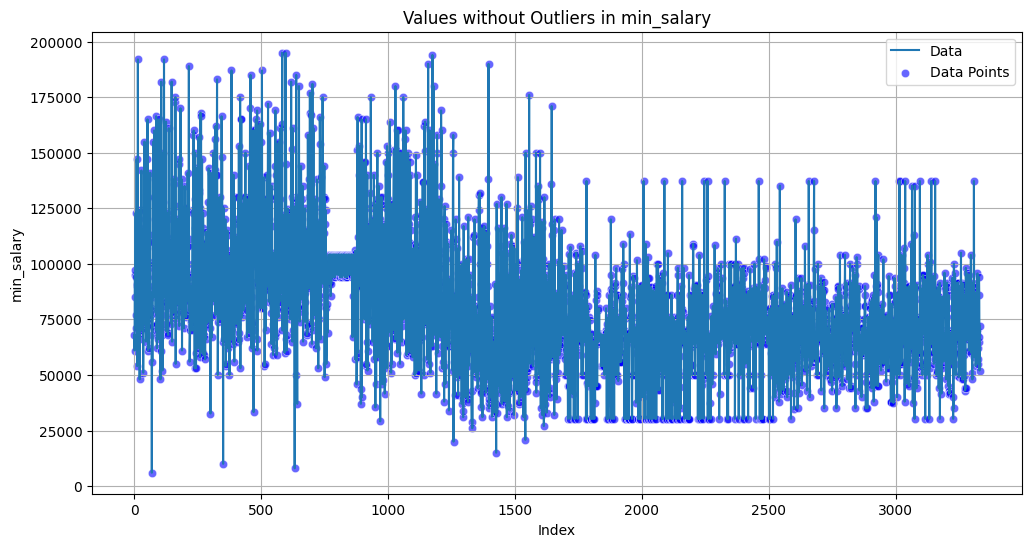

In [128]:
detect_and_plot_outliers(job_postings, 'min_salary')

In [129]:
dos = [219, 297, 545, 1070, 1133, 1171, 1310, 1377, 1493]

jobs_min_outliers = job_postings.loc[dos]

display(jobs_min_outliers)

,id,job_title,job_info,position_type_id,company,city,location_id,skills,seniority_level_id,work_type,industry_type_id,min_salary,max_salary,avg_salary,company_score,sector,responsabilities,requirements
219,220,Software Developers,Unspecified,1,Allied Business Consulting,Somerset,30,NaN,2,Unspecified,1,202000.0,290000.0,246000.0,3.8,Unspecified,NaN,NaN
297,298,Test Software Engineer,Unspecified,1,Vantaca,Nashua,29,NaN,1,Unspecified,1,208000.0,208000.0,208000.0,4.5,Unspecified,NaN,NaN
545,546,Software Engineer - Rider Support Tools,Unspecified,1,Root//Source,Foster City,5,NaN,1,Unspecified,1,205920.0,205920.0,205920.0,3.5,Unspecified,NaN,NaN
1070,1071,"Director, Data Science",Kargo creates breakthrough cross-screen ad exp...,11,Kargo,New York,32,"['We do not discriminate on the basis of race,...",1,Unspecified,18,200000.0,240000.0,220000.0,3.8,Media & Entertainment,[],"[""Kargo creates breakthrough cross-screen ad e..."
1133,1134,"Vice President, Analytics Products",Who We Are Insurity’s vision is all abo...,7,Insurity,Remote,51,['While our product suites are some of the mos...,1,Unspecified,31,200000.0,260000.0,230000.0,3.7,Information Technology,[],"[""What our VP, Partnerships & Commercializat..."
1171,1172,"Director, Data Science",Comcast brings together the best in media and ...,11,Comcast Corporation,Philadelphia,38,['Grow and expand skillset of team with an eye...,1,Unspecified,19,200000.0,240000.0,220000.0,3.8,Telecommunications,[],"[""We drive innovation to create the world's be..."
1310,1311,Senior Data Scientist,Who we want: Are you committed to using your ...,11,Gallup,Washington,47,['Are you a leader who applies your instincts ...,3,Unspecified,13,200000.0,275000.0,237500.0,4.2,Business Services,[],['Previous or current Top-Secret U.S. governme...
1377,1378,Principal Data Scientist With Over 10 Years Ex...,Position Title: Principal Data Scientist Loca...,11,Ca-One Tech Cloud,San Francisco,5,"[""Pandas, MATLAB, R); Have proficiency in vis...",3,Unspecified,20,200000.0,250000.0,225000.0,1.0,Information Technology,[],['Apply if you: Have 5+ years of programming ...
1493,1494,"Director Ii, Data Science - Grm Actuarial",Advance your career at Liberty Mutual Insuranc...,11,Liberty Mutual Insurance,Chicago,13,['This role requires broad knowledge of predic...,1,Unspecified,2,202000.0,306000.0,254000.0,3.3,Insurance,[],"[""Qualifications: Master's Degree in Mathem..."


<Axes: xlabel='seniority_level_id', ylabel='min_salary'>

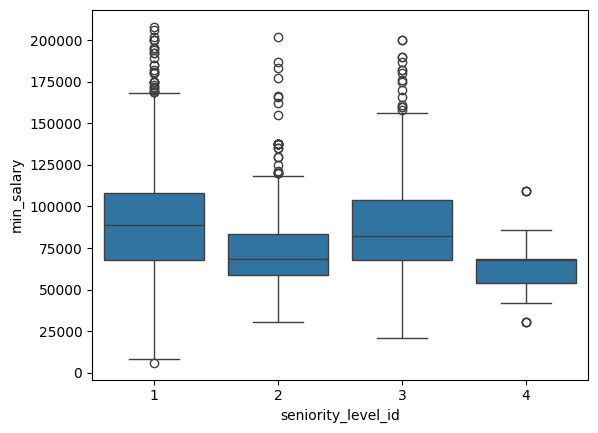

In [130]:
sns.boxplot(x='seniority_level_id', y='min_salary', data=job_postings)

<Axes: xlabel='seniority_level_id', ylabel='max_salary'>

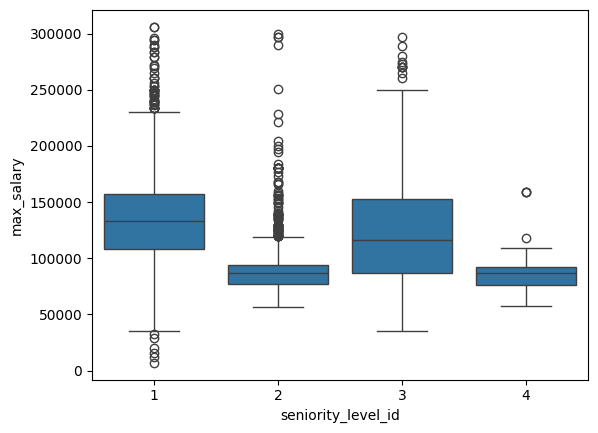

In [131]:
sns.boxplot(x='seniority_level_id', y='max_salary', data=job_postings)

<Axes: xlabel='seniority_level_id', ylabel='avg_salary'>

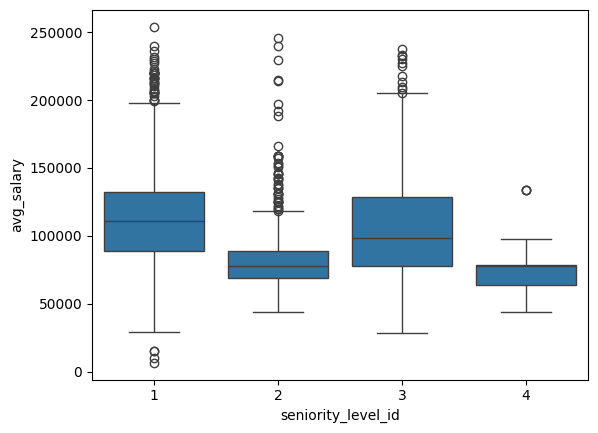

In [132]:
sns.boxplot(x='seniority_level_id', y='avg_salary', data=job_postings)

In [147]:
df=job_postings[job_postings["location_id"].isin([20, 23, 29, 33, 36, 37, 39, 47, 52])]
df.shape[0]

389

<Axes: xlabel='seniority_level_id', ylabel='avg_salary'>

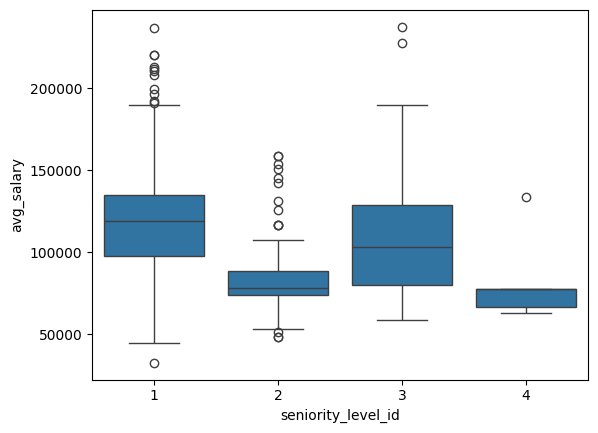

In [134]:
sns.boxplot(x='seniority_level_id', y='avg_salary', data=df)

In [157]:
df_filtrado = job_postings[~((job_postings['avg_salary'] > 150000) & (job_postings['seniority_level_id'] == 1))]

# Calcular el promedio de 'avg_salary' agrupado por 'seniority_level_id' en el DataFrame filtrado
promedios = df_filtrado.groupby('seniority_level_id')['avg_salary'].mean().reset_index()

# Mostrar los resultados
print(promedios.round(2))

   seniority_level_id  avg_salary
0                   1   102087.04
1                   2    79907.36
2                   3   105734.37
3                   4    76846.99


<Axes: xlabel='seniority_level_id', ylabel='avg_salary'>

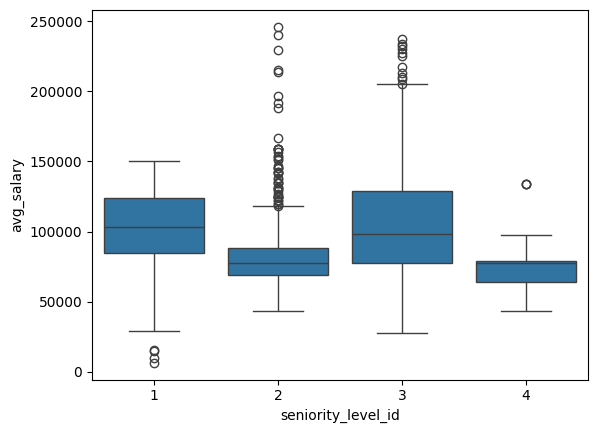

In [158]:
sns.boxplot(x='seniority_level_id', y='avg_salary', data=df_filtrado)

In [159]:
df_filtrado.shape[0]

3103